In [1]:
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
data = load_digits()

In [3]:
X = pd.DataFrame(data.data, columns=data.feature_names)
Y = data.target

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

## K-Neighbours Classifier

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knnclf = GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors':[3,5,10,20,25],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights' : ['uniform', 'distance'],
}, cv=5, return_train_score=False)

In [9]:
knnclf.fit(X,Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 10, 20, 25],
                         'weights': ['uniform', 'distance']})

In [11]:
pd.DataFrame(knnclf.cv_results_)[['param_algorithm','param_n_neighbors','param_weights','mean_test_score']]

,param_algorithm,param_n_neighbors,param_weights,mean_test_score
0,auto,3,uniform,0.966622
1,auto,3,distance,0.966065
2,auto,5,uniform,0.962728
3,auto,5,distance,0.963282
4,auto,10,uniform,0.954943
5,auto,10,distance,0.958836
6,auto,20,uniform,0.949373
7,auto,20,distance,0.953825
8,auto,25,uniform,0.945481
9,auto,25,distance,0.952156


In [13]:
knnclf.best_score_

0.966621788919839

In [14]:
knnclf.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}

In [17]:
model = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')

model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
pred = model.predict(x_test)
pred[:5], y_test[:5]

(array([3, 1, 2, 7, 1]), array([3, 8, 2, 7, 1]))

<Axes: >

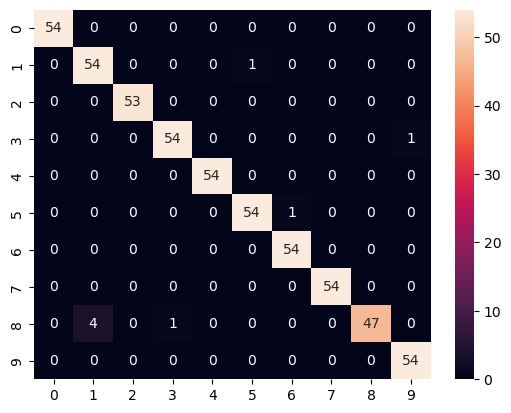

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test,pred)

sns.heatmap(cf, annot=True)